# Week 7 Assignment

This week we are collecting some data from Reddit and doing some basic EDA on it. You should:

- create your Reddit account and API keys
- collect data from a subreddit of your choice
    - at a minimum, collect the posts from the subreddit; optionally collect comments on the posts
- save the data to a SQLite3 database
- perform some basic EDA on the data
    - create at least 2 plots
- write a short analysis at the end describing the process and results
- turn in the Jupyter Notebook and PDF printout or export to the week 7 dropbox

***Optional* advanced section**
- Practice SQL queries and select a subsection of the posts you collected
- Modify your code to collect data beyond the 1000 item limit
- Collect comments from the posts for analysis next week and do some EDA on the comments (e.g. who is the top commenter, which commenters have the most up and down votes or most controversial posts, etc)
- examine n-grams ([bigrams](https://stackoverflow.com/a/37651184/4549682), trigrams) or [collocations](https://www.geeksforgeeks.org/nlp-word-collocations/)

Note: There is no solution file for this week.

In [2]:
pip install credentials

  Obtaining dependency information for praw from https://files.pythonhosted.org/packages/81/6a/21bc058bcccbe03f6a0895bf1bd60c805f0c526aa4e9bfaac775ed0b299c/praw-7.7.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install credentials

Note: you may need to restart the kernel to use updated packages.


In [4]:
import praw
import pandas as pd

import credentials

In [12]:
reddit = praw.Reddit(client_id='FROiJb46c9guomB9cAYC6A',
                     client_secret='Xa9ensh1PTTGYC7ORct24NRmbs8tFA',
                     user_agent='testapp')

In [13]:
co_subreddit = reddit.subreddit('brazil').hot(limit=5)

In [14]:
for post in co_subreddit:
    print(post.title, post.score)

I wanted to buy a phone for a friend in Brazil, over Brazilian Amazon to avoid the huge import fees i got last year. But then it asks me for a code i dont have, something i can do? 98
Is there a specific term to refer to luso-cognate words contrasted in foreign contexts? 182
In need of a Brazilian resident to get me an online service 2
Indigenous women are showing us how to fight for environmental and human rights | V (formerly known as Eve Ensler) 3
‘We defended our right to the land’: Brazil’s Indigenous people hail supreme court victory 7


In [15]:
list(co_subreddit)

[]

In [16]:
post.score

7

In [17]:
reddit_data = {'title': [],
              'link': [],
              'author': [],
              'n_comments': [],
              'score': [],
              'text': []}


co_subreddit = reddit.subreddit('brazil').hot(limit=100)

for post in list(co_subreddit):
    reddit_data['title'].append(post.title)
    reddit_data['link'].append(post.permalink)
    if post.author is None:
        reddit_data['author'].append('')
    else:
        reddit_data['author'].append(post.author.name)
    
    reddit_data['n_comments'].append(post.num_comments)
    reddit_data['score'].append(post.score)
    reddit_data['text'].append(post.selftext)

In [18]:
co_df = pd.DataFrame(reddit_data)

In [19]:
co_df

,title,link,author,n_comments,score,text
0,I wanted to buy a phone for a friend in Brazil...,/r/Brazil/comments/16rv12i/i_wanted_to_buy_a_p...,SovietPuma1707,44,99,
1,Is there a specific term to refer to luso-cogn...,/r/Brazil/comments/16r6std/is_there_a_specific...,Different_Low7781,35,182,
2,In need of a Brazilian resident to get me an o...,/r/Brazil/comments/16ryme0/in_need_of_a_brazil...,NeedleworkerCrazy400,3,2,Hi there to all Brazilian people. \nI need t...
3,Indigenous women are showing us how to fight f...,/r/Brazil/comments/16rsyyy/indigenous_women_ar...,brazil_bot,0,3,
4,‘We defended our right to the land’: Brazil’s ...,/r/Brazil/comments/16rk49x/we_defended_our_rig...,brazil_bot,1,9,
...,...,...,...,...,...,...
95,Need an apartment/ Roommate in Santa Barbara (...,/r/Brazil/comments/16m76a1/need_an_apartment_r...,AnteM16,0,1,I'm staying in Brasil for an internship for 5 ...
96,Chapeco - what to do?,/r/Brazil/comments/16lw74l/chapeco_what_to_do/,Olivia150323,9,2,"Dear Brazilians,\n\nIn november I will finally..."
97,Booked a trip to brasil without checking the r...,/r/Brazil/comments/16l7rzw/booked_a_trip_to_br...,desdo21,117,98,"Hey, I’m living in Germany and was extremely c..."
98,The Busiest Subway in the World? | São Paulo M...,/r/Brazil/comments/16leuwk/the_busiest_subway_...,capybara_from_hell,11,37,


In [20]:
import sqlite3

con = sqlite3.connect("co_reddit.sqlite")
co_df.to_sql('posts', con, if_exists='replace', index=False)

100

In [21]:
co_df_check = pd.read_sql_query('SELECT * FROM posts;', con)
# it's best to close the connection when finished
con.close()
co_df_check

,title,link,author,n_comments,score,text
0,I wanted to buy a phone for a friend in Brazil...,/r/Brazil/comments/16rv12i/i_wanted_to_buy_a_p...,SovietPuma1707,44,99,
1,Is there a specific term to refer to luso-cogn...,/r/Brazil/comments/16r6std/is_there_a_specific...,Different_Low7781,35,182,
2,In need of a Brazilian resident to get me an o...,/r/Brazil/comments/16ryme0/in_need_of_a_brazil...,NeedleworkerCrazy400,3,2,Hi there to all Brazilian people. \nI need t...
3,Indigenous women are showing us how to fight f...,/r/Brazil/comments/16rsyyy/indigenous_women_ar...,brazil_bot,0,3,
4,‘We defended our right to the land’: Brazil’s ...,/r/Brazil/comments/16rk49x/we_defended_our_rig...,brazil_bot,1,9,
...,...,...,...,...,...,...
95,Need an apartment/ Roommate in Santa Barbara (...,/r/Brazil/comments/16m76a1/need_an_apartment_r...,AnteM16,0,1,I'm staying in Brasil for an internship for 5 ...
96,Chapeco - what to do?,/r/Brazil/comments/16lw74l/chapeco_what_to_do/,Olivia150323,9,2,"Dear Brazilians,\n\nIn november I will finally..."
97,Booked a trip to brasil without checking the r...,/r/Brazil/comments/16l7rzw/booked_a_trip_to_br...,desdo21,117,98,"Hey, I’m living in Germany and was extremely c..."
98,The Busiest Subway in the World? | São Paulo M...,/r/Brazil/comments/16leuwk/the_busiest_subway_...,capybara_from_hell,11,37,


<Axes: ylabel='Frequency'>

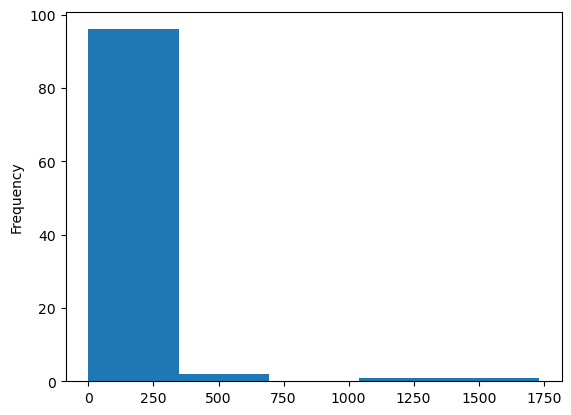

In [25]:
co_df['score'].plot.hist(bins=5)

<Axes: ylabel='Frequency'>

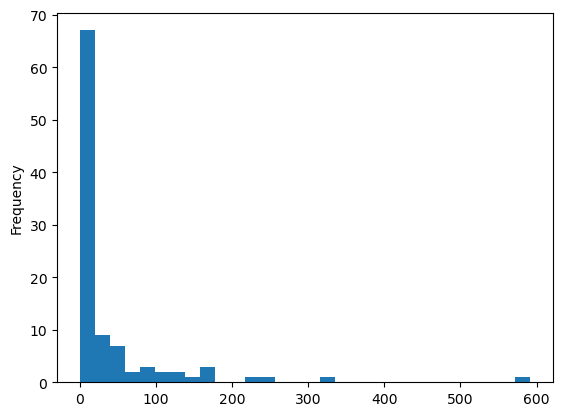

In [26]:
co_df['n_comments'].plot.hist(bins=30)

<Axes: xlabel='author'>

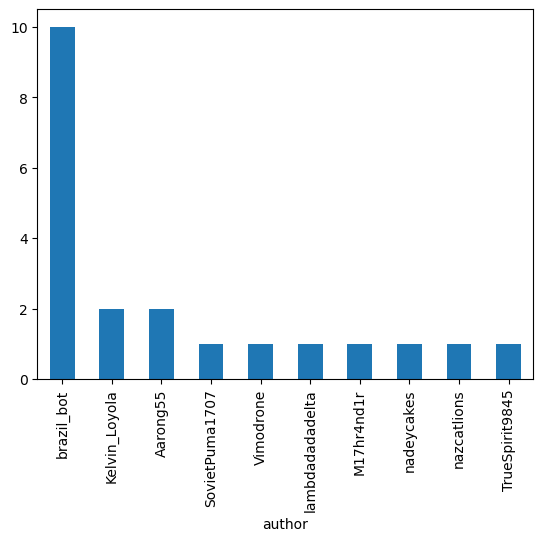

In [27]:
co_df['author'].value_counts()[:10].plot.bar()

# Analysis

The hardest part about this lab was accessing the reddit information. It was not complicated, but rather the exact information needed to place into the Praw method call was hiddent. Thankfully, the users of reddit provide a small example on how this is working. This api is really cool, the amount of content that can be gathered from this API is wild, it is like surfing through certain subreddits, and analyzing the authors, posts, and comments. I believe this is something that could be very useful. With a small amount of machine learning and AI, it would be easy to predict how and where to post to gain karma. Great assignment, my favorite thus far! 